#Drive

# Dependências

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#diretório para trabalho
%cd /content/gdrive/Shareddrives/MQAA2022/Trabalho

/content/gdrive/Shareddrives/MQAA2022/Trabalho


In [3]:
#install
!pip install ipython
!pip install basedosdados
!pip install matplotlib
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 9.9 MB 9.0 MB/s 
     |████████████████████████████████| 108 kB 70.2 MB/s 
     |████████████████████████████████| 105 kB 73.9 MB/s 
     |████████████████████████████████| 58 kB 7.8 MB/s 
     |████████████████████████████████| 203 kB 14.3 MB/s 
     |████████████████████████████████| 3.6 MB 45.2 MB/s 
     |████████████████████████████████| 135 kB 18.9 MB/s 
     |████████████████████████████████| 133 kB 74.2 MB/s 
     |████████████████████████████████| 1.1 MB 60.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 70 k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#imports
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Trabalho


In [5]:
baixarBanco = True

In [6]:

if baixarBanco:
  import basedosdados as bd
  # Para carregar o dado direto no pandas
  df = bd.read_table(dataset_id='br_cgu_pessoal_executivo_federal',
  table_id='terceirizados',
  billing_project_id="emprego-287823")
  display(df)
  df.to_excel('terceirizados.xlsx',sheet_name='Terceirizados')
else:
  df = pd.read_excel('terceirizados.xlsx')

FileNotFoundError: ignored

## Recorte

In [ ]:
#removendo linhas com células vazias
df.dropna(inplace = True)

original = df

In [ ]:
df = original

In [ ]:
#selecionando colunas
df = df[['ano',
   'mes',
   'id_terceirizado',
   'sigla_orgao_superior_unidade_gestora',
   'sigla_unidade_gestora',
   'contrato_empresa',
   'cnpj_empresa',
   'razao_social_empresa',
   'nome',
   'categoria_profissional',
   'nivel_escolaridade',
   'quantidade_horas_trabalhadas_semanais',
   'unidade_trabalho',
   'valor_mensal',
   'custo_mensal',
   'sigla_orgao_trabalho'
   ]]
  
#display(df)

In [ ]:
#padronizando números mensais
df['custo_mensal'] = df['custo_mensal'].str.replace(',','.')
df['custo_mensal'] = df['custo_mensal'].astype(float)
df['custo_mensal'] = df['custo_mensal']*100
df['custo_mensal'] = df['custo_mensal'].astype(int)
df['custo_mensal'] = df['custo_mensal']/100
df['custo_mensal'] = df['custo_mensal'].astype(float)

df['valor_mensal'] = df['valor_mensal'].str.replace(',','.')
df['valor_mensal'] = df['valor_mensal'].astype(float)
df['valor_mensal'] = df['valor_mensal']*100
df['valor_mensal'] = df['valor_mensal'].astype(int)
df['valor_mensal'] = df['valor_mensal']/100
df['valor_mensal'] = df['valor_mensal'].astype(float)

#display(df['custo_mensal'])
#display(df['valor_mensal'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df.loc[df['custo_mensal'] >= 710000, ['nome','cnpj_empresa','razao_social_empresa']]

,nome,cnpj_empresa,razao_social_empresa
268027,LEANDRO ABEL DA SILVA,3.328330e+11,"DINAMICA ADMINISTRACAO, SERVICOS E OBRAS LTDA."


In [ ]:
df.loc[df['valor_mensal'] >= 20000, ['nome','categoria_profissional']]

,nome,categoria_profissional
81933,MAURO CESAR ZANATTA ALVES,261125 - JORNALISTA
83181,MAURO CESAR ZANATTA ALVES,261125 - JORNALISTA
87072,GUSTAVO PAUL KURRLE,261125 - JORNALISTA
227419,PAULO HENRIQUE SILVA CRUZ,203220 - PESQUISADOR DE ENGENHARIA MECANICA
227508,AKIRA HOMMA,142120 - TECNOLOGO EM GESTAO ADMINISTRATIVO- F...
227798,TATIANA GUIMARAES NORONHA,142120 - TECNOLOGO EM GESTAO ADMINISTRATIVO- F...
228044,DIEGO CAETANO DE ASSIS PEREIRA,203220 - PESQUISADOR DE ENGENHARIA MECANICA
228195,MARIA DE LOURDES DE SOUSA MAIA,142120 - TECNOLOGO EM GESTAO ADMINISTRATIVO- F...
228844,LUCIANO AGONIGI,203220 - PESQUISADOR DE ENGENHARIA MECANICA
230697,AKIRA HOMMA,142120 - TECNOLOGO EM GESTAO ADMINISTRATIVO- F...


In [ ]:
#padronizando horas trabalhadas e retirando valores não informados

df = df[pd.to_numeric(df['quantidade_horas_trabalhadas_semanais'], errors='coerce').notnull()]

df['quantidade_horas_trabalhadas_semanais'] = df['quantidade_horas_trabalhadas_semanais'].astype(float)
#display(df['quantidade_horas_trabalhadas_semanais'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Medidas Resumo

Sugere-se que o número de variáveis a serem analisadas não ultrapasse 5.



In [ ]:
#media tercerizados contratados por empresa
#media horas trabalhadas semanais por empresa
#media custo mensal por empresa
#moda categoria_profissional
#media e mediana ano/tempo de contrato (?)
display(df)

,ano,mes,id_terceirizado,sigla_orgao_superior_unidade_gestora,sigla_unidade_gestora,contrato_empresa,cnpj_empresa,razao_social_empresa,nome,categoria_profissional,nivel_escolaridade,quantidade_horas_trabalhadas_semanais,unidade_trabalho,valor_mensal,custo_mensal,sigla_orgao_trabalho
0,2021.0,9.0,8145166,ME.,SPU/ES,01/2018,1.195517e+13,SPANDEX SERVICOS LTDA-ME,DHEILLA DE JESUS,513425 - COPEIRO,ENSINO MEDIO COMPLETO,44.0,SAMF/ES,1185.68,2887.75,MPDG
1,2021.0,9.0,8145167,ME.,SPU/ES,01/2018,1.195517e+13,SPANDEX SERVICOS LTDA-ME,KARLA SIRLENE GOMES RIBEIRO MUNIZ,"422105 - RECEPCIONISTA, EM GERAL",SUPERIOR COMPLETO,44.0,SPU/ES,1976.33,4268.79,MPDG
2,2021.0,9.0,8145168,ME.,SPU/ES,01/2018,1.195517e+13,SPANDEX SERVICOS LTDA-ME,LETICIA ANANIA DA CUNHA,"422105 - RECEPCIONISTA, EM GERAL",SUPERIOR INCOMPLETO,44.0,SPU/ES,1976.33,4268.79,MPDG
3,2021.0,9.0,8145169,ME.,SPU/ES,01/2018,1.195517e+13,SPANDEX SERVICOS LTDA-ME,HELENA BOSSI PESSINI VIEIRA,"422105 - RECEPCIONISTA, EM GERAL",SUPERIOR COMPLETO,44.0,SPU/ES,1976.33,4268.79,MPDG
4,2021.0,9.0,8145170,ME.,SPU/ES,01/2018,1.195517e+13,SPANDEX SERVICOS LTDA-ME,THAYANE FERREIRA DE OLIVEIRA,"422105 - RECEPCIONISTA, EM GERAL",SUPERIOR INCOMPLETO,44.0,SPU/ES,1976.33,4268.79,MPDG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406652,2019.0,1.0,7092167,MDS,INSS/CGLC,51/2017,7.366311e+13,TEL CENTRO DE CONTATOS LTDA,VANESSA OLIVEIRA SANTOS,422305 - OPERADOR DE TELEMARKETING ATIVO,ENSINO MEDIO COMPLETO,36.0,APS TELEATENDIMENTO SALVADOR,954.00,2222.21,INSS
406653,2019.0,1.0,7092168,MDS,INSS/CGLC,51/2017,7.366311e+13,TEL CENTRO DE CONTATOS LTDA,RAFAELA DOS SANTOS VITORIO,422305 - OPERADOR DE TELEMARKETING ATIVO,ENSINO MEDIO COMPLETO,36.0,APS TELEATENDIMENTO SALVADOR,954.00,2222.21,INSS
406654,2019.0,1.0,7092169,MDS,INSS/CGLC,51/2017,7.366311e+13,TEL CENTRO DE CONTATOS LTDA,DAISY PEIXOTO DE JESUS,422305 - OPERADOR DE TELEMARKETING ATIVO,SUPERIOR INCOMPLETO,36.0,APS TELEATENDIMENTO SALVADOR,983.85,2291.73,INSS
406655,2019.0,1.0,7092170,MDS,INSS/CGLC,51/2017,7.366311e+13,TEL CENTRO DE CONTATOS LTDA,AGATA SERPA DA SILVA,422305 - OPERADOR DE TELEMARKETING ATIVO,ENSINO MEDIO COMPLETO,36.0,APS TELEATENDIMENTO SALVADOR,954.00,2222.21,INSS


In [ ]:
def medidas_resumo_agrupada(df,coluna,agrupamento):
  print(coluna+' por '+agrupamento)
  print("media:", df.groupby(agrupamento)[coluna].sum().mean())
  print("mediana:",df.groupby(agrupamento)[coluna].sum().median())
  print("moda:", df.groupby(agrupamento)[coluna].sum().mode())
  print("max:", df.groupby(agrupamento)[coluna].sum().max())
  print("min:", df.groupby(agrupamento)[coluna].sum().min())

def medidas_resumo(df,coluna):
  media = df[coluna].mean()
  mediana = df[coluna].median()
  moda = df[coluna].mode().array
  max = df[coluna].max()
  min = df[coluna].min()

  resultados =  {
    "media": media,
    "mediana": mediana,
    "moda": moda,
    "max": max,
    "min": min
  }
  return resultados

###Por empresa

In [ ]:
#valor mensal por empresa
medidas_resumo_agrupada(df,'valor_mensal','cnpj_empresa')

#custo mensal por empresa
medidas_resumo_agrupada(df,'custo_mensal','cnpj_empresa')

#media horas trabalhadas semanais por empresa
medidas_resumo_agrupada(df,'quantidade_horas_trabalhadas_semanais','cnpj_empresa')

valor_mensal por cnpj_empresa
media: 328506.08800360543
mediana: 53084.619999999995
moda: 0    1000.00
1    2167.00
2    2300.00
3    3025.46
4    3600.00
5    3900.00
6    6000.00
7    6400.00
dtype: float64
max: 37584663.85999952
min: 431.2
custo_mensal por cnpj_empresa
media: 850551.065534022
mediana: 142059.15000000005
moda: 0     7217.46
1    80896.86
dtype: float64
max: 99904101.8999965
min: 1313.65
quantidade_horas_trabalhadas_semanais por cnpj_empresa
media: 7449.799008562415
mediana: 1452.0
moda: 0    176.0
dtype: float64
max: 453040.0
min: 10.0


###Por terceirizadados

In [ ]:
#valor mensal por empresa
medidasValorMensal = medidas_resumo(df,'valor_mensal')

#custo mensal por empresa
medidasCustoMensal = medidas_resumo(df,'custo_mensal')

#media horas trabalhadas semanais por empresa
medidasHorasMensal = medidas_resumo(df,'quantidade_horas_trabalhadas_semanais')

medidas = {
    "valor mensal": medidasValorMensal,
    "custo mensal": medidasCustoMensal,
    "horas mensais": medidasHorasMensal,
}

medidasDf = pd.DataFrame(medidas)
display(medidasDf)

#moda categoria_profissional
moda_categoria_profissional = df['categoria_profissional'].value_counts().nlargest(10)
print("10 mais frequentes categoria_profissional:")
print(moda_categoria_profissional)

,valor mensal,custo mensal,horas mensais
media,1818.378,4708.050784,41.236833
mediana,1429.68,4032.79,44.0
moda,[1045.0],[1787.5],[44.0]
max,23839.5,710286.0,57.0
min,0.0,0.0,10.0


10 mais frequentes categoria_profissional:
517330 - VIGILANTE                                      80085
514320 - FAXINEIRO                                      72708
422105 - RECEPCIONISTA, EM GERAL                        23795
411005 - AUXILIAR DE ESCRITORIO                         21254
411010 - ASSISTENTE ADMINISTRATIVO                      17281
422305 - OPERADOR DE TELEMARKETING ATIVO                17030
422310 - OPERADOR DE TELEMARKETING ATIVO E RECEPTIVO    13994
351505 - TECNICO EM SECRETARIADO                         8973
517410 - PORTEIRO DE EDIFICIOS                           8787
422315 - OPERADOR DE TELEMARKETING RECEPTIVO             5474
Name: categoria_profissional, dtype: int64


In [ ]:
#nivel de escolaridade
print(df['nivel_escolaridade'].value_counts().nlargest(20))

ENSINO MEDIO COMPLETO            170727
ENSINO FUNDAMENTAL COMPLETO       92173
SEM EXIGENCIA                     49622
ENSINO FUNDAMENTAL INCOMPLETO     29372
SUPERIOR COMPLETO                 23260
CURSO TECNICO COMPLETO            10297
ALFABETIZADO                       8821
SUPERIOR INCOMPLETO                7037
ENSINO MEDIO INCOMPLETO            4510
ESPECIALIZACAO/RESIDENCIA          2165
NAO SABE LER/ESCREVER               584
POS GRADUACAO                       327
DOUTORADO                           180
MESTRADO                            118
19                                   89
14                                   83
15                                   73
16                                   66
17                                   62
18                                   56
Name: nivel_escolaridade, dtype: int64


##Histograma

In [ ]:
#tercerizados contratados por empresa
#horas trabalhadas semanais por empresa
#custo mensal

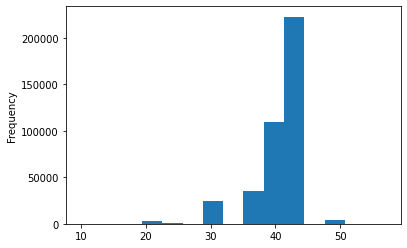

In [ ]:
#horas trabalhadas semanais
df['quantidade_horas_trabalhadas_semanais'].plot.hist(bins=15)

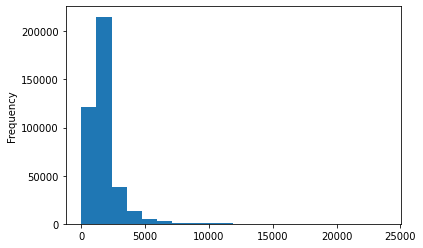

In [ ]:
#valor mensal
df['valor_mensal'].plot.hist(bins=20)

AttributeError: ignored

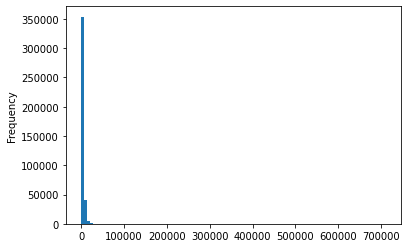

In [ ]:
#custo mensal
df['custo_mensal'].plot.hist(bins=100)
sns.distplot(a=df.carat, hist=False)
plt.show()


In [ ]:

#ainda não faz sentido - tentando fazer por empresa
df['valor_mensal'].plot.hist(by='cnpj_empresa', bins =15)


## Medidas de variabilidade

In [ ]:
#desvio padrão
#variancia
#coeficiente de variação

In [ ]:
#desvio padrão e variancia valor_mensal
std_valor_mensal= df['valor_mensal'].std()
print("desvio padrão valor_mensal:", std_valor_mensal)

var_valor_mensal= df['valor_mensal'].var()
print("variancia valor_mensal:", var_valor_mensal)


#desvio padrão e variancia custo_mensal
std_custo_mensal= df['custo_mensal'].std()
print("desvio padrão custo_mensal:", std_custo_mensal)

var_custo_mensal= df['custo_mensal'].var()
print("variancia custo_mensal:", var_custo_mensal)

#desvio padrao e variancia horas_trabalhadas
std_horas_trabalhadas_semanais= df['quantidade_horas_trabalhadas_semanais'].std()
print("std_horas_trabalhadas_semanais:", std_horas_trabalhadas_semanais)

var_horas_trabalhadas_semanais= df['quantidade_horas_trabalhadas_semanais'].var()
print("var_horas_trabalhadas_semanais:", var_horas_trabalhadas_semanais)


## Avaliação de normalidade

## Medidas separatrizes

###Boxplot

In [ ]:
def make_boxplot(df,coluna):
  bp = df.boxplot(column=[coluna], return_type ='dict')
  outliers = [flier.get_ydata() for flier in bp["fliers"]]
  outliers = outliers[0]
  print("Número de outliers:", len(outliers))
  medians = [item.get_ydata()[0] for item in bp['medians']]
  means = df[coluna].mean()
  print(f'Mediana: {medians}\n'
        f'Media:   {means}')  
  q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
  q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
  print(f'Q1: {q1}\n'
        f'Q3: {q3}')

#### Com outliers

In [ ]:
make_boxplot(df,'quantidade_horas_trabalhadas_semanais')

In [ ]:
make_boxplot(df,'valor_mensal')

In [ ]:
make_boxplot(df,'custo_mensal')

####Sem outliers

In [ ]:
df.boxplot(column=['quantidade_horas_trabalhadas_semanais'], showfliers=False)

In [ ]:
df.boxplot(column=['valor_mensal'], showfliers=False)


In [ ]:
df.boxplot(column=['custo_mensal'], showfliers=False)

# Regressão Linear Multipla



In [ ]:
from sklearn import linear_model
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [ ]:
def printarParametros(model, X, y):
  print("Intercept")
  print(model.intercept_)
  print("\nCoeficientes calculados")
  print(model.coef_)

  print("\nR²")
  print(model.score(X, y))


In [ ]:
def criarRegressao(X,y):
  regr = linear_model.LinearRegression()
  regr.fit(X, y)
  return regr;



In [ ]:
#filteredDf = df
filteredDf = df[df['custo_mensal'] < 200000]

X = filteredDf[['valor_mensal','quantidade_horas_trabalhadas_semanais']]
y = filteredDf['custo_mensal']

reg = criarRegressao(X, y)
printarParametros(reg, filteredDf[['valor_mensal','quantidade_horas_trabalhadas_semanais']], filteredDf['custo_mensal'])


In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


In [ ]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(est2, "valor_mensal", fig=fig)

# Análise de Variância

Nesta seção iramos utilizar as técnicas de análise de variância ANOVA / MANOVA

tais técnicas permitem entender se um certo tratamento (ou grupo) possui efeito para certa variável dependente (ANOVA) ou certas variáveis dependentes (MANOVA)
determinando o quão acima da pura natureza aleatória dos dados é o tratamento validando-se através da estatística F.

## Teste das suposições estatísticas para aplicação da ANOVA / MANOVA

### Normalidade

In [ ]:
# importa teste de shapiro
from scipy.stats import norm
from scipy.stats import kstest
import scipy.stats as stats

import math

def normalityTest(title, data):
  x = np.linspace(data.min(), data.max(), 100)
  mu, std = norm.fit(data) 
  p = norm.pdf(x, mu, std)
  plt.hist(data, bins=math.floor(50), density=True, alpha=0.6)
  plt.plot(x, p, 'k', linewidth=2)
  plt.title('normalidade para ' + title)
  plt.show()
  
  print('teste de Kolmogorov', kstest(data, 'norm'))

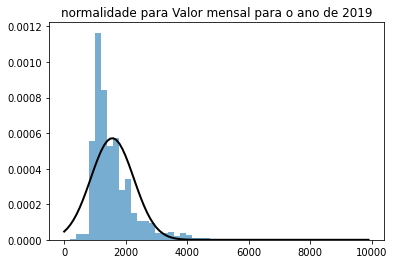

teste de Kolmogorov KstestResult(statistic=0.9999838658933051, pvalue=0.0)


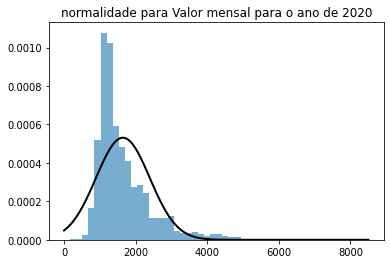

teste de Kolmogorov KstestResult(statistic=0.9999907840896524, pvalue=0.0)


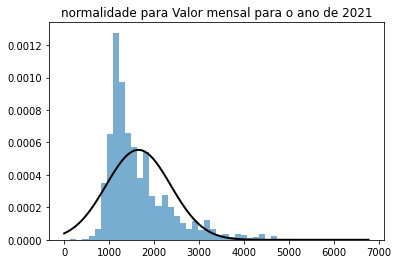

teste de Kolmogorov KstestResult(statistic=0.9999529557246163, pvalue=0.0)


In [ ]:
# teste de normalidade para variável custo mensal dividido pelo ano
# Plot the PDF.

custoMensal = df[df['custo_mensal'] < 200000]['custo_mensal']
filteredCustoMensal =  df[(df['custo_mensal'] > 0) & (df['custo_mensal'] < 10000)]

custoMensalAno2019 = filteredCustoMensal['valor_mensal'][filteredCustoMensal['ano'] == 2019];
custoMensalAno2020 = filteredCustoMensal['valor_mensal'][filteredCustoMensal['ano'] == 2020];
custoMensalAno2021 = filteredCustoMensal['valor_mensal'][filteredCustoMensal['ano'] == 2021];

normalityTest('Valor mensal para o ano de 2019', custoMensalAno2019)
normalityTest('Valor mensal para o ano de 2020', custoMensalAno2020)
normalityTest('Valor mensal para o ano de 2021', custoMensalAno2021)

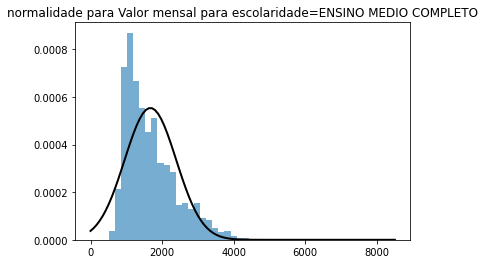

teste de Kolmogorov KstestResult(statistic=0.9999579377478668, pvalue=0.0)


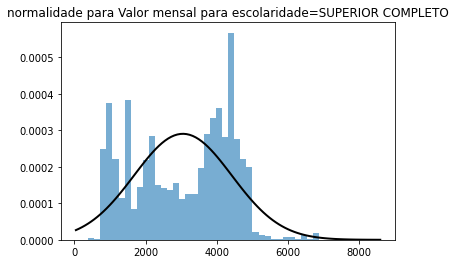

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


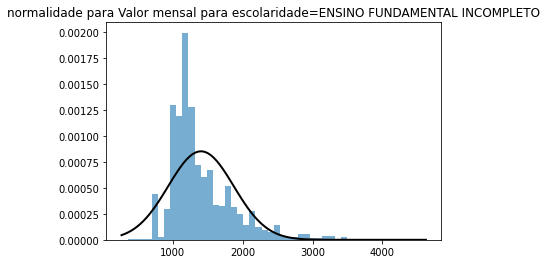

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


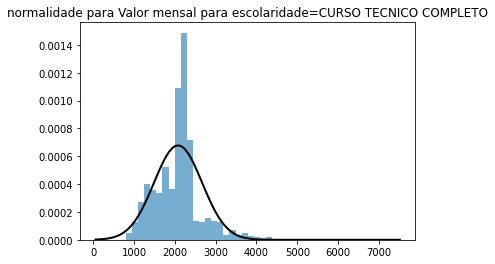

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


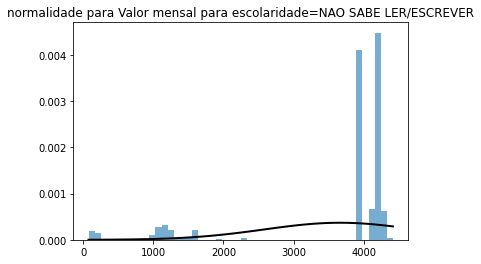

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


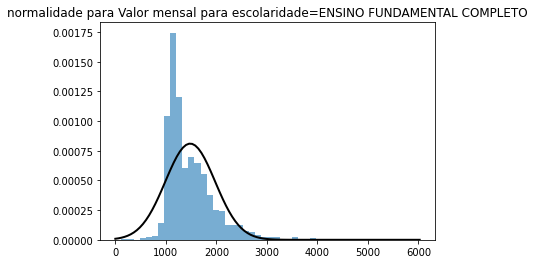

teste de Kolmogorov KstestResult(statistic=0.999988999989, pvalue=0.0)


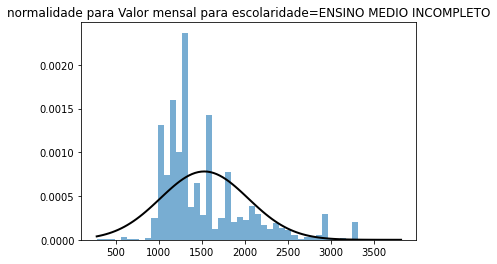

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


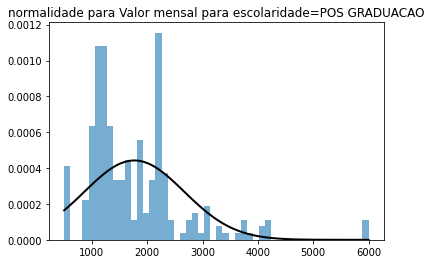

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


In [ ]:
# teste de normalidade para variável custo mensal dividido pela escolaridade
# Plot the PDF.

custoMensal = df[df['custo_mensal'] < 200000]['custo_mensal']
filteredCustoMensal =  df[(df['custo_mensal'] > 0) & (df['custo_mensal'] < 10000)]

escolaridades = ['ENSINO MEDIO COMPLETO',
'SUPERIOR COMPLETO',
'ENSINO FUNDAMENTAL INCOMPLETO',
'CURSO TECNICO COMPLETO',
'NAO SABE LER/ESCREVER',
'ENSINO FUNDAMENTAL COMPLETO',
'ENSINO MEDIO INCOMPLETO',
'POS GRADUACAO']

for escolaridade in escolaridades:
  normalityTest(f'Valor mensal para escolaridade={escolaridade}', filteredCustoMensal['valor_mensal'][filteredCustoMensal['nivel_escolaridade'] == escolaridade])


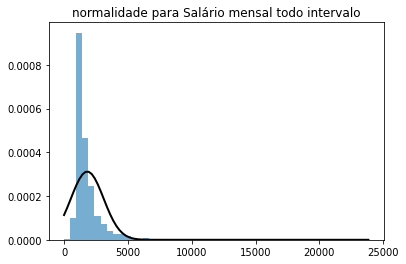

teste de Kolmogorov KstestResult(statistic=0.9999600880059469, pvalue=0.0)


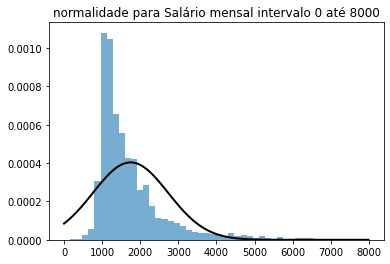

teste de Kolmogorov KstestResult(statistic=0.999997484181793, pvalue=0.0)


In [ ]:
# teste de normalidade para variável salário mensal
# Plot the PDF.

salarioMensal = df['valor_mensal']
filteredSalarioMensal =  df[(df['valor_mensal'] > 0) & (df['valor_mensal'] < 8000)]['valor_mensal']

normalityTest('Salário mensal todo intervalo', salarioMensal)
normalityTest('Salário mensal intervalo 0 até 8000', filteredSalarioMensal)

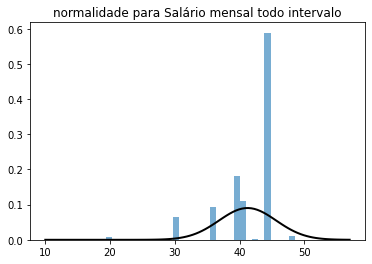

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


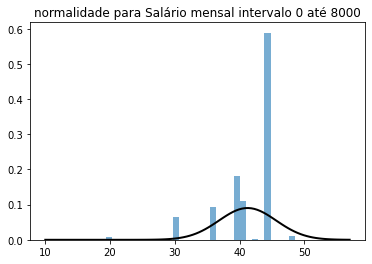

teste de Kolmogorov KstestResult(statistic=1.0, pvalue=0.0)


In [ ]:
# teste de normalidade para variável salário mensal
# Plot the PDF.

salarioMensal = df['quantidade_horas_trabalhadas_semanais']
filteredSalarioMensal =  df[(df['quantidade_horas_trabalhadas_semanais'] > 0) & (df['quantidade_horas_trabalhadas_semanais'] < 8000)]['quantidade_horas_trabalhadas_semanais']

normalityTest('Salário mensal todo intervalo', salarioMensal)
normalityTest('Salário mensal intervalo 0 até 8000', filteredSalarioMensal)

### Variância

As variancias dentre os grupos precisam ser semelhantes

In [ ]:
filteredDf =  df[(df['custo_mensal'] > 0) & (df['custo_mensal'] < 10000)]

varianciasEscolaridade = {
           'ENSINO MEDIO COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO MEDIO COMPLETO'].var(),
           'SUPERIOR COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'SUPERIOR COMPLETO'].var(),
           'ENSINO FUNDAMENTAL INCOMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO FUNDAMENTAL INCOMPLETO'].var(),
           'CURSO TECNICO COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'CURSO TECNICO COMPLETO'].var(),
           'ENSINO FUNDAMENTAL COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO FUNDAMENTAL COMPLETO'].var(),
           'ENSINO MEDIO INCOMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO MEDIO INCOMPLETO'].var(),
           'POS GRADUACAO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'POS GRADUACAO'].var()
          }

varianciasAno = {
    '2019':  filteredDf['valor_mensal'][filteredDf['ano'] == 2019].var(),
    '2020':  filteredDf['valor_mensal'][filteredDf['ano'] == 2020].var(),
    '2021':  filteredDf['valor_mensal'][filteredDf['ano'] == 2021].var()
}

display(pd.DataFrame.from_dict(varianciasEscolaridade, orient='index'))
display(pd.DataFrame.from_dict(varianciasAno, orient='index'))



,0
ENSINO MEDIO COMPLETO,5.184828e+05
SUPERIOR COMPLETO,1.884511e+06
ENSINO FUNDAMENTAL INCOMPLETO,2.188040e+05
CURSO TECNICO COMPLETO,3.456708e+05
ENSINO FUNDAMENTAL COMPLETO,2.421168e+05
ENSINO MEDIO INCOMPLETO,2.605698e+05
POS GRADUACAO,8.157338e+05


,0
2019,487090.536559
2020,563784.696593
2021,517584.048810


### Linearidade

In [ ]:
from sklearn import linear_model
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

def criarRegressao(X,y):
  regr = linear_model.LinearRegression()
  regr.fit(X, y)
  return regr;

def calcularResiduos(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results
def testeLinear(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    
    # Calculating residuals for the plot
    df_results = calcularResiduos(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [ ]:

filteredDf = df[df['custo_mensal'] < 100000]

X = filteredDf[['valor_mensal','quantidade_horas_trabalhadas_semanais']]
y = filteredDf['custo_mensal']

reg = criarRegressao(X, y)
testeLinear(reg, X, y)

## ANOVA para Salário mensal e ANO

Com esta análise espera-se obter significância do ANO como tratamento para o valor de salário mensal, de acordo com o crescimento anual do salário mínimo e reajustes do IPCA

In [ ]:
import scipy.stats as stats


filteredDf = df[df['custo_mensal'] < 100000]

# Determinando os anos
grupos_de_ano = filteredDf['ano'].unique();
display(grupos_de_ano)

for ano in grupos_de_ano:
  print(f'média para {ano}:', filteredDf['valor_mensal'][filteredDf['ano'] == ano].mean())




stats.f_oneway(filteredDf['valor_mensal'][filteredDf['ano'] == 2019],
               filteredDf['valor_mensal'][filteredDf['ano'] == 2020],
               filteredDf['valor_mensal'][filteredDf['ano'] == 2021])



## Anova para salário mensal e escolaridade

In [ ]:
import scipy.stats as stats


filteredDf = df[df['custo_mensal'] < 100000]

# Determinando os anos
escolaridades = filteredDf['nivel_escolaridade'][filteredDf['nivel_escolaridade'].str.isnumeric() == False].unique();
# display(escolaridades)



medias = {
           'ENSINO MEDIO COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO MEDIO COMPLETO'].mean(),
           'SUPERIOR COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'SUPERIOR COMPLETO'].mean(),
           'ENSINO FUNDAMENTAL INCOMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO FUNDAMENTAL INCOMPLETO'].mean(),
           'CURSO TECNICO COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'CURSO TECNICO COMPLETO'].mean(),
           'ENSINO FUNDAMENTAL COMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO FUNDAMENTAL COMPLETO'].mean(),
           'ENSINO MEDIO INCOMPLETO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO MEDIO INCOMPLETO'].mean(),
           'POS GRADUACAO': filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'POS GRADUACAO'].mean()
          }

display(pd.DataFrame.from_dict(medias, orient='index'))



anova = stats.f_oneway(
    filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO MEDIO COMPLETO'],
               filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'SUPERIOR COMPLETO'],
               filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO FUNDAMENTAL INCOMPLETO'],
               filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'CURSO TECNICO COMPLETO'],
               filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO FUNDAMENTAL COMPLETO'],
               filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'ENSINO MEDIO INCOMPLETO'],
               filteredDf['valor_mensal'][filteredDf['nivel_escolaridade'] == 'POS GRADUACAO'],               
               )

display(anova)



# Outros

In [ ]:
import pandas as pd
import gspread
from google.colab import auth
import gspread
from google.auth import default

def sheet_to_pandas(URL):
  #autenticando usuário
  from google.colab import auth
  auth.authenticate_user()

  #autorizando usuário para o sheets especificamente
  import gspread
  from google.auth import default
  creds, _ = default()

  gc = gspread.authorize(creds)

  #outra forma de abrir um sheets
  #worksheet = gc.open('Cópia de planejamento semestral aberto').sheet1

  #abrindo sheets com url
  worksheet = gc.open_by_url(URL).sheet1 #abrindo primeira página

  #passando para pandas pq é uma biblioteca mais popular
  df = pd.DataFrame(worksheet.get_all_records())
  return df

URL = 'https://docs.google.com/spreadsheets/d/1FRevSP6DMGdx8UnIdTl_HzuluOHNDGYgUdSYW6-Q7Sw/edit?usp=sharing'
sheet_to_pandas(URL)